In [1]:
import plotly
import math
import string
import random
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
from collections import Counter, OrderedDict, defaultdict
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
LETTERS = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя "

## Реализуйте базовый частотный метод по Шерлоку Холмсу:
    подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);


In [2]:
with open('corpora/WarAndPeace.txt', 'r') as iofile:
    ru_text = iofile.readlines()

Функция убирающая лишние симфолы, и убираующая пунктуацию, подсчитывающая частоту встречаемости букв

In [3]:
def frequency(text):
    st = []
    ru_string = []
    tota = OrderedDict()
    tokenizer = RegexpTokenizer(r'\w+')
    for i in range(len(text)):
        total = tokenizer.tokenize(text[i])
        st.append(" ".join(total).lower())
    totalstr = " ".join(st)
    for i in totalstr:
        if i in "абвгдеёжзийклмнопрстуфхцчшщъыьэюя ":
            ru_string.append(i)
    res = FreqDist(ru_string)
    return (res)
fdist = frequency(ru_text)

Посмотрим на распреледение букв в тесте, в целом, очень похоже на частоту встречаемости букв в той же википедии (https://ru.wikipedia.org/wiki/Русский_алфавит)

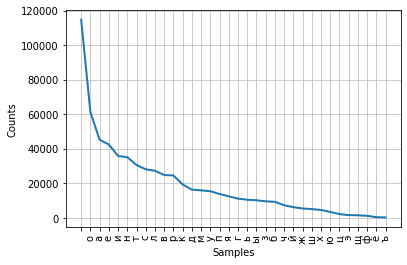

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
fdist.plot(cumulative=False)

    возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;

In [41]:
exam = "Многие шифры, не отличающиеся сложным алгоритмом, могут быть расшифрованы специалистами и без наличия ключа, для этого существуют некоторые специальные методы, называемые методами криптоанализа. Один из таких способов это частотный анализ. Частотный анализ предполагает, что каждая буква алфавита того или иного языка в довольно длинном тексте встречается с определенной частотой. Как же работает данный метод? К примеру, имеется зашифрованный текст, полученный методом какой-либо перестановки букв по определенному алгоритму, и аналитикам требуется его расшифровать. Для этого берется открытый текст, желательно довольно длинный, затем подсчитывается в нем частота каждой буквы, причем, чем больше будет текст, тем точнее получится расшифровка. ёу"

In [6]:
def caesar_cipher(exam):
    text_for_encrypt = exam.lower().replace(',', '').replace('.', '').replace('?', '')
    letters = LETTERS
    arr = []
    step = 3
    for i in text_for_encrypt:
        arr.append(letters[(letters.find(i) + step) % 34])
    text_for_decrypt = ''.join(arr)
    return text_for_decrypt
to_decrypt = caesar_cipher(exam)

In [7]:
print (to_decrypt)

прсёлзвылчуюврзвсхолъгаьлзфбвфосйрюпвгоёсулхпспвпсёцхвдюхявугфылчусегрювфтзщлголфхгплвлвдзкврголълбвноаъгвжобв хсёсвфцьзфхецахврзнсхсуюзвфтзщлгоярюзвпзхсжювргкюегзпюзвпзхсжгплвнултхсгрголкгвсжлрвлквхгнлшвфтсфсдсев хсвъгфхсхрюмвгрголквъгфхсхрюмвгрголквтузжтсогёгзхвъхсвнгйжгбвдцнегвгочгелхгвхсёсвлолвлрсёсвбкюнгвевжсесоярсвжолррспвхзнфхзвефхузъгзхфбвфвстузжзозррсмвъгфхсхсмвнгнвйзвугдсхгзхвжгррюмвпзхсжвнвтулпзуцвлпззхфбвкгылчусегррюмвхзнфхвтсоцъзррюмвпзхсжспвнгнсмволдсвтзузфхгрсенлвдцневтсвстузжзозррспцвгоёсулхпцвлвгрголхлнгпвхуздцзхфбвзёсвугфылчусегхявжобв хсёсвдзузхфбвсхнуюхюмвхзнфхвйзогхзоярсвжсесоярсвжолррюмвкгхзпвтсжфълхюегзхфбвеврзпвъгфхсхгвнгйжсмвдцнеювтулъзпвъзпвдсояызвдцжзхвхзнфхвхзпвхсърззвтсоцълхфбвугфылчусенг


    расшифруйте их таким частотным методом.

In [8]:
def freq_text(text):
    res = FreqDist(text)
    return (res)
f_decrypted = freq_text(to_decrypt)

In [9]:
def decrypt_text(tex_to, fdist, f_decrypted):
    arr_encrypt_text = []
    arr_encrypt_letters = list(OrderedDict(sorted(fdist.items(), key=lambda t: t[1], reverse=True)))
    arr_decrypt_letters = list(OrderedDict(sorted(f_decrypted.items(), key=lambda t: t[1], reverse=True)))
    dictionary = dict(zip(arr_decrypt_letters, arr_encrypt_letters))
    for i in tex_to:
        arr_encrypt_text.append(dictionary.get(i))
    text_for_decrypt = ''.join(arr_encrypt_text)
    return(text_for_decrypt, dictionary)
result, dictionary = decrypt_text(to_decrypt, fdist, f_decrypted)

[' ', 'о', 'а', 'е', 'и', 'н', 'т', 'с', 'л', 'в', 'р', 'к', 'д', 'м', 'у', 'п', 'я', 'г', 'ь', 'ы', 'з', 'б', 'ч', 'й', 'ж', 'ш', 'х', 'ю', 'ц', 'э', 'щ', 'ф', 'ё', 'ъ']
['в', 'с', 'х', 'з', 'г', 'л', 'р', 'ф', 'о', 'п', 'у', 'н', 'ю', 'ж', 'е', 'ъ', 'т', 'ц', 'б', 'д', 'м', 'ё', 'к', 'я', 'ы', 'ч', 'й', 'а', ' ', 'ь', 'щ', 'ш']


In [10]:
print(result)

втобне жншрд те оалнпиюэнесь слохтдв илборнавов вобга ыдай рисжншроуитд сяещнилнсаивн н ыеч тилнпнь клюпи мль цаобо сгэесаугюа текоаорде сяещнилйтде веаомд тичдуиевде веаомивн крняаоитилнчи омнт нч аикнф сяосоыоу цао писаоатдз итилнч писаоатдз итилнч яремяолибиеа пао кихмиь ыгкуи илшиунаи аобо нлн нтобо ьчдки у моуолйто млнттов аексае усарепиеась с ояремелеттоз писаоаоз кик хе риыоаиеа миттдз веаом к ярнверг нвееась чижншроуиттдз аекса яолгпеттдз веаомов кикоз лныо яересаитоукн ыгку яо ояремелеттовг илборнавг н итилнанкив ареыгеась ебо рисжншроуиай мль цаобо ыереась оакрдадз аекса хелиаелйто моуолйто млнттдз чиаев яомспнадуиеась у тев писаоаи кихмоз ыгкуд ярнпев пев ыолйже ыгмеа аекса аев аоптее яолгпнась рисжншроуки


## Вряд ли в результате получилась такая уж хорошая расшифровка. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
    подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
    


In [12]:
    def create_scoring_params_dict(data):
        scoring_params = {}
        alphabet_list = list(LETTERS.upper())
        for i in range(0, len(data)-1):
            alpha_i = data[i].upper()
            alpha_j = data[i+1].upper()
            if alpha_i not in alphabet_list:
                alpha_i = " "
            if alpha_j not in alphabet_list:
                alpha_j = " "
            if alpha_j == " " and alpha_i == " ":
                key = " "
            else: 
                key = alpha_i+alpha_j
            #if key != "  ":
            if key in scoring_params:
                scoring_params[key]+=1
            else:
                scoring_params[key]=1
        return Counter(scoring_params)
bigrams_dict_text = create_scoring_params_dict(ru_tex)
bigram_dict_encrypted = create_scoring_params_dict(to_decrypt)


    проведите тестирование аналогично п.1, но при помощи биграмм.

In [15]:
def decrypt_text(text_for_decrypt, bigrams_dict_text, bigram_dict_encrypted):
    arr_encrypt_text = []
    arr_encrypt_letters = list(OrderedDict(sorted(bigrams_dict_text.items(), key=lambda t: t[1], reverse=True)))[:len(bigram_dict_encrypted)]
    arr_decrypt_letters = list(OrderedDict(sorted(bigram_dict_encrypted.items(), key=lambda t: t[1], reverse=True)))
    dictionary = dict(zip(arr_decrypt_letters, arr_encrypt_letters))
    for i in range(0, len(text_for_decrypt)-1, 2):
        alpha_i = text_for_decrypt[i].upper()
        alpha_j = text_for_decrypt[i+1].upper()
        arr_encrypt_text.append(dictionary.get(alpha_i + alpha_j))
    text_for_decrypt = ''.join(arr_encrypt_text)
    return(text_for_decrypt, dictionary)
decrypted_text_bi, dictionary = decrypt_text(to_decrypt, bigrams_dict_text, bigram_dict_encrypted)

{'ХС': ' ', 'ФХ': 'О ', 'СВ': 'И ', 'ЗХ': 'А ', 'ОЛ': 'Е ', 'БВ': ' С', 'МВ': ' П', 'ПВ': ' В', 'ГО': ' Н', 'РС': 'ТО', 'ЗВ': ' О', 'РЮ': 'Я ', 'ВХ': ' К', 'СХ': ' И', 'ХВ': 'СТ', 'ВД': 'Ь ', 'СЕ': 'НА', 'ГР': 'ГО', 'ВТ': 'АЛ', 'ХЗ': 'НЕ', 'ЪГ': 'ПО', 'ФБ': 'НО', 'ЁС': 'РА', 'ГФ': 'КО', 'ВН': 'ОВ', 'ВЖ': 'Л ', 'ЮМ': 'Й ', 'УЗ': 'КА', 'НГ': ' Б', 'РР': 'М ', 'СЁ': ' Т', 'ВФ': 'ВО', 'ВГ': ' Д', 'ЛХ': 'РО', 'ЕГ': 'ЕР', 'ХГ': 'ОЛ', 'ЛВ': 'ЕН', 'ВЛ': 'ОН', 'РГ': 'НИ', 'ГВ': 'У ', 'ПЗ': 'ОС', 'СЖ': 'ОТ', 'ЗП': 'ЛА', 'ТС': 'ЛИ', 'ВЪ': 'ЛО', 'СО': 'ОР', 'ХФ': 'В ', 'ЫЛ': 'ЕЛ', 'ЛЧ': 'РЕ', 'ЧУ': 'ПР', 'ВР': 'ВА', 'ВС': ' М', 'УЛ': 'ЗА', 'ВП': 'ТА', 'ЗН': 'РИ', 'ОЯ': ' Г', 'ГЗ': ' Ч', 'ТУ': 'АН', 'ДЦ': 'К ', 'ЮВ': 'ИЛ', 'РЗ': 'ТЬ', 'СП': 'ОМ', 'ВУ': 'СК', 'УГ': 'АТ', 'УС': 'ОГ', 'КВ': 'Т ', 'ЖО': 'ТЕ', 'ЯР': 'Н ', 'ЛК': 'ОД', 'ЛР': ' Р', 'ДС': 'Ы ', 'ЕВ': 'АК', 'ЖС': 'ДЕ', 'НФ': 'ВЕ', 'ЗО': ' З', 'СМ': 'ДА', 'УЮ': 'АЗ', 'ЛЪ': ' Е', 'ЗФ': ' У', 'СУ': 'ЕМ', 'ФЫ': 'АС', 'ФТ': 'ЖЕ', 'ТЗ': 'ЛЕ', 'ГП'

In [16]:
decrypted_text_bi

'ШЕ ТХ ЧАРЕАЗВА О ИЕ ПООЕХ НОВОШИТУЛЯ ДРУЕМРОНЫ ВНЫИДСТСВСЯСККОЕЛПРНАГОИЛЖЕВСННЕ О ОЙЕНЕНТРТ НИЕ БЫ СОКИКУ ТЕ СМО ТИ СИГЛО ОЖ ЯВАРИ ИЕМДОВОЛЕЧЕ НН ДОТАА ОТИЛНИМАЕРЛАДОТАА ОТОЙЕНМЕЗН ГО НОДУ ОТ РОНТ ОЛАРИЦЖЕИЙУТНАЕТ ЛОКО АМЙ  ДНИЕ Т ПОО  ИЯ  ПГО НОДАЛКАУСОРЯТ ЧСТЛСИ  Б ЛГРЬ ЧТЕР ДВНЕВРОУ  РАОНЕ ОНТОРАОШМА БТИЛ НАОРН И ТЕ РТО ВНЕВЕНЕТИО КАПОА НОВО МАНАВ ЗНЯТО ППОО  ИДАОВЕСПЕ ОАТЫ ОЛА Л ГОЯ  ПОС ЩЕСОАНИЕСЬИТИЕСЛВ  СЛЬЕЛПРНАГОЯ  ПНЕВЕСТЛИКНВИМ Й ТАА ОТОМОВЕСДАИЧЧИИ ЛЕКАО ГОНААРЬ ЧТАКЛИ МАНАВ ЗНЯТОМУ ДРУЕМРОМУОН ДНИЕ ПА Б ВИВБА ХВ  СМНИ АТАСРЕОГЕРСЯЛ ИСЕТ РАЬ СЬА НО МЖИАЗБО ПНЕВЕСТЕДСЕНЕ ГТОЛ НАОРН И ТЕ РЯ  ПЛЬНЕ ВЛИД БЫБОЕРА НОТИВАЛАЛОКО ОЛОВВЫДЕ ПК Ю ИЛАН ЕЛАЛОЛАЬ ОРЕЗ ОК ЕГСТНЕВЕСТНЕ В РЯСЛАЛОРХОРОНОСККОЕЛПРНА Б'

## Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
    предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм

Модель для обучения позаимствована из этого источника с соответствующими доработками:
https://towardsdatascience.com/applications-of-mcmc-for-cryptography-and-optimization-1f99222b7132

In [18]:
import string
import math
import random
#
# This function takes as input a decryption key and creates a dict for key where each letter in the decryption key
# maps to a alphabet For example if the decryption key is "DGHJKL...." this function will create a dict like {D:A,G:B,H:C....} 
def create_cipher_dict(cipher):
    cipher_dict = {}
    alphabet_list = list(f_test.keys())
    for i in range(len(cipher)):
        cipher_dict[alphabet_list[i]] = cipher[i]
    return cipher_dict

# This function takes a text and applies the cipher/key on the text and returns text.
def apply_cipher_on_text(text,cipher):
    cipher_dict = create_cipher_dict(cipher) 
    text = list(text)
    newtext = ""
    for elem in text:
        if elem in cipher_dict:
            newtext += cipher_dict[elem]
            #print (newtext)
            #print (newtext)
        else:
            newtext+=""
    #print (newtext)
    return newtext

In [19]:
# This function takes as input a path to a long text and creates scoring_params dict which contains the 
# number of time each pair of alphabet appears together
# Ex. {'AB':234,'TH':2343,'CD':23 ..}
def score_params_on_cipher(text):
    scoring_params = {}
    alphabet_list = list(LETTERS.upper())
    data = list(text.strip())
    for i in range(len(data)-1):
        alpha_i =data[i].upper()
        alpha_j = data[i+1].upper()
        if alpha_i not in alphabet_list: #and alpha_i != " ":
            alpha_i = " "
        if alpha_j not in alphabet_list: #and alpha_j != " ":
            alpha_j = " "
        if alpha_j == " " and alpha_i == " ":
            key = " "
        else: 
            key = alpha_i+alpha_j
        #if key != "  ":
        if key in scoring_params:
            scoring_params[key]+=1
        else:
            scoring_params[key]=1
    return scoring_params

# This function takes as input a text and creates scoring_params dict which contains the 
# number of time each pair of alphabet appears together
# Ex. {'AB':234,'TH':2343,'CD':23 ..}

def create_scoring_params_dict(data):
    scoring_params = {}
    alphabet_list = list(LETTERS.upper())
    for i in range(len(data)-1):
        #print (data[i])
        alpha_i = data[i].upper()
        alpha_j = data[i+1].upper()
        #if alpha_i in alphabet_list and alpha_j in alphabet_list:# and alpha_i != " ":
        #    key = alpha_i+alpha_j
        #    if key in scoring_params:
        #        scoring_params[key]+=1
        #    else:
        #        scoring_params[key]=1
        if alpha_i not in alphabet_list: #and alpha_i != " ":
            alpha_i = ""
        if alpha_j not in alphabet_list: #and alpha_j != " ":
            alpha_j = ""
        if alpha_j == " " and alpha_i == " ":
            key = " "
        else: 
            key = alpha_i+alpha_j
        #if key != "  ":
        if key in scoring_params:
            scoring_params[key]+=1
        else:
            scoring_params[key]=1
    return scoring_params

# This function takes the text to be decrypted and a cipher to score the cipher.
# This function returns the log(score) metric

def get_cipher_score(text,cipher,scoring_params):
    cipher_dict = create_cipher_dict(cipher)
    decrypted_text = apply_cipher_on_text(text,cipher)
    scored_f = score_params_on_cipher(decrypted_text)
    #print (scored_f)
    cipher_score = 0
    for k,v in scored_f.items():
        if k in scoring_params:
            cipher_score += v*math.log(scoring_params[k])
    return cipher_score

In [42]:
text0 = exam.lower().replace(',', '').replace('.', '').replace('?', '')
def freq_text(text):
    res = FreqDist(text)
    return (res)
f_test = freq_text(text0)



In [44]:
# Generate a proposal cipher by swapping letters at two random location
def generate_cipher(cipher):
    pos1 = random.randint(0, len(list(cipher))-1)
    pos2 = random.randint(0, len(list(cipher))-1)
    #print (len(list(cipher))-1, pos1, pos2)
    if pos1 == pos2:
        return generate_cipher(cipher)
    else:
        cipher = list(cipher)
        #print(cipher)
        pos1_alpha = cipher[pos1]
        pos2_alpha = cipher[pos2]
        cipher[pos1] = pos2_alpha
        cipher[pos2] = pos1_alpha
        #print (cipher)
        return "".join(cipher)

# Toss a random coin with robability of head p. If coin comes head return true else false.
def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True

In [89]:
def MCMC_decrypt(n_iter,cipher_text,scoring_params):
    current_cipher = "ЕСЛИ ВЫДТНОРЖАЬЙПЧКУЭГБЩЯЗМЮШЦЁХЪФ"
    state_keeper = set()
    best_state = ''
    score = 0
    for i in range(n_iter):
        state_keeper.add(current_cipher)
        proposed_cipher = generate_cipher(current_cipher)
        score_current_cipher = get_cipher_score(cipher_text,current_cipher,scoring_params)
        score_proposed_cipher = get_cipher_score(cipher_text,proposed_cipher,scoring_params)
        acceptance_probability = min(1,math.exp(score_proposed_cipher-score_current_cipher))
        if score_current_cipher>score:
            best_state = current_cipher
        if random_coin(acceptance_probability):
            current_cipher = proposed_cipher
    return state_keeper,best_state

In [91]:
## Run the Main Program:

scoring_params = create_scoring_params_dict(ru_tex)
#print (scoring_params)
plain_text = text0

#encryption_key = 
cipher_text = plain_text
print("Text To Decode:", cipher_text)
print("\n")
states,best_state = MCMC_decrypt(50000,cipher_text,scoring_params)
print("\n")
print("Decoded Text:",apply_cipher_on_text(cipher_text,best_state))
print("\n")
print("MCMC KEY FOUND:",best_state)
print("ACTUAL DECRYPTION KEY:",decryption_key)

Text To Decode: многие шифры не отличающиеся сложным алгоритмом могут быть расшифрованы специалистами и без наличия ключа для этого существуют некоторые специальные методы называемые методами криптоанализа один из таких способов это частотный анализ частотный анализ предполагает что каждая буква алфавита того или иного языка в довольно длинном тексте встречается с определенной частотой как же работает данный метод к примеру имеется зашифрованный текст полученный методом какой-либо перестановки букв по определенному алгоритму и аналитикам требуется его расшифровать для этого берется открытый текст желательно довольно длинный затем подсчитывается в нем частота каждой буквы причем чем больше будет текст тем точнее получится расшифровка ёу




Decoded Text: 


MCMC KEY FOUND: 
ACTUAL DECRYPTION KEY: ЭЮЯ ГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬ


In [65]:
text1 = "დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ"
def freq_text(text):
    res = FreqDist(text)
    return (res)
f_test = freq_text(text1)
f_test["a"] = 0
f_test["b"] = 0
f_test["c"] = 0
f_test["d"] = 0
f_test["e"] = 0
f_test["f"] = 0

['დ', 'ჳ', 'ჵ', 'Ⴢ', 'Ⴈ', 'შ', 'Ⴜ', 'ხ', 'ჲ', 'ს', 'Ⴙ', 'Ⴍ', 'ჾ', 'Ⴃ', 'ი', 'ჰ', 'Ⴒ', 'Ⴇ', 'Ⴉ', 'Ⴧ', 'Ⴀ', 'ქ', 'ჱ', 'ჶ', 'Ⴝ', 'ე', 'Ⴞ', 'ნ', 'a', 'b', 'c', 'd', 'e', 'f']


In [90]:
scoring_params = create_scoring_params_dict(ru_tex)
plain_text = text1
cipher_text = plain_text
print("Text To Decode:", cipher_text)
print("\n")
states,best_state = MCMC_decrypt(50000,cipher_text,scoring_params)
print("\n")
print("Decoded Text:",apply_cipher_on_text(cipher_text,best_state))

Text To Decode: დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ




Decoded Text: ЕСЛИ ВЫ ВИДИТЕ НОРЖАЛЬНЫЙ ИЛИ ПОЧТИ НОРЖАЛЬНЫЙ ТЕКСТ У ЭТОГО СООБЩЕНИЯ КОТОРЫЙ ЛЕГКО ПРОЧИТАТЬ СКОРЕЕ ВСЕГО ВЫ ВСЕ СДЕЛАЛИ ПРАВИЛЬНО И ПОЛУЧИТЕ ЖАКСИЖАЛЬНЫЙ БАЛЛ ЗА ПОСЛЕДНЕЕ ЧЕТВЕРТОЕ ЗАДАНИЕ КУРСА МОТЯ КОНЕЧНО Я НИЧЕГО НЕ ОБЕЩАЮ


## Бонус: а что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.


In [81]:

def score_params_on_cipher(text):
    scoring_params = {}
    alphabet_list = list(LETTERS.upper())
    data = list(text.strip())
    for i in range(len(data)-2):
        alpha_i = data[i].upper()
        alpha_j = data[i+1].upper()
        alpha_k = data[i+k].upper()
        if alpha_i not in alphabet_list: 
            alpha_i = ""
        if alpha_j not in alphabet_list: 
            alpha_j = ""
        if alpha_k not in alphabet_list: 
            alpha_k = ""
        if alpha_j == " " and alpha_i == " ":
            key = " "
        if alpha_j == " " and alpha_k == " ":
            key = " "
        if alpha_i == " " and alpha_k == " ":
            key = " "
        else: 
            key = alpha_i+alpha_j+alpha_k
        if key in scoring_params:
            scoring_params[key]+=1
        else:
            scoring_params[key]=1
    return scoring_params

def create_scoring_params_dict(data):
    scoring_params = {}
    alphabet_list = list(LETTERS.upper())
    for i in range(len(data)-2):
        alpha_i = data[i].upper()
        alpha_j = data[i+1].upper()
        alpha_k = data[i+2].upper()
        if alpha_i not in alphabet_list: 
            alpha_i = ""
        if alpha_j not in alphabet_list: 
            alpha_j = ""
        if alpha_k not in alphabet_list: 
            alpha_k = ""
        if alpha_j == " " and alpha_i == " ":
            key = " "
        if alpha_j == " " and alpha_k == " ":
            key = " "
        if alpha_i == " " and alpha_k == " ":
            key = " "
        else: 
            key = alpha_i+alpha_j+alpha_k
        if key in scoring_params:
            scoring_params[key]+=1
        else:
            scoring_params[key]=1
    return scoring_params


In [86]:
scoring_params = create_scoring_params_dict(ru_tex)
plain_text = text1
cipher_text = plain_text
print("Text To Decode:", cipher_text)
print("\n")
states,best_state = MCMC_decrypt(50000,cipher_text,scoring_params)
print("\n")
print("Decoded Text:",apply_cipher_on_text(cipher_text,best_state))


Text To Decode: დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ


iter 0 : АБВТДЕЁДЕТЖТЗАДИЙКЛМВНИЁОДТВТДПЙРЗТДИЙКЛМВНИЁОДЗАСБЗДГДУЗЙФЙДБЙЙХЦАИТЧДСЙЗЙКЁОДВАФСЙДПКЙРТЗМЗНДБСЙК
iter 500 : А ТИЕНЫЕНИБИВАЕМОЙДСТУМЫЦЕИТИЕГОРВИЕМОЙДСТУМЫЦЕВАЛ ВЕПЕЪВОКОЕ ООЖЯАМИЬЕЛОВОЙЫЦЕТАКЛОЕГЙОРИВСВУЕ ЛОЙ
iter 1000 : СИТ ЕНЧЕН П ВСЕМОЗДАТУМЧЬЕ Т ЕГОРВ ЕМОЗДАТУМЧЬЕВСЛИВЕЫЕЯВОКОЕИООЩШСМ ЖЕЛОВОЗЧЬЕТСКЛОЕГЗОР ВАВУЕИЛОЗ
iter 1500 : ИСТ ЕМЫЕМ П ВИЕРОДНАТУРЫШЕ Т ЕГОЙВ ЕРОДНАТУРЫШЕВИЛСВЕЯЕЬВОКОЕСООБЖИР ЧЕЛОВОДЫШЕТИКЛОЕГДОЙ ВАВУЕСЛОД
iter 2000 : ИСТ ЕЙЫЕЙ З НИЕЛОДМАТУЛЫШЕ Т ЕГОВН ЕЛОДМАТУЛЫШЕНИРСНЕЯЕЬНОКОЕСООБЩИЛ ЧЕРОНОДЫШЕТИКРОЕГДОВ НАНУЕСРОД
iter 2500 : ИСТ ЕЙЫЕЙ З НИЕЛОДМАТУЛЫШЕ Т ЕГОВН ЕЛОДМАТУЛЫШЕНИРСНЕЯЕЬНОКОЕСООБЖИЛ ЧЕРОНОДЫШЕТИКРОЕГДОВ НАНУЕСРОД
iter 3000 : ИСТ ЕЙЫЕЙ П НИЕЛОДРАТУЛЫШЕ Т ЕГОВН ЕЛОДРАТУЛЫШЕНИМСНЕЯЕЖНОКОЕСООБЩИЛ ЧЕ